<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Предварительный-анализ-полученных-данных:" data-toc-modified-id="Предварительный-анализ-полученных-данных:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предварительный анализ полученных данных:</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Очистка-текста" data-toc-modified-id="Очистка-текста-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Очистка текста</a></span></li><li><span><a href="#Wordnet-Lemmatizer-с-соответствующим-POS-тегом" data-toc-modified-id="Wordnet-Lemmatizer-с-соответствующим-POS-тегом-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Wordnet Lemmatizer с соответствующим POS-тегом</a></span></li><li><span><a href="#Проверка-дисбаланса" data-toc-modified-id="Проверка-дисбаланса-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Проверка дисбаланса</a></span></li><li><span><a href="#Стоп-слова" data-toc-modified-id="Стоп-слова-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Стоп-слова</a></span></li><li><span><a href="#Выводы-по-предобработке-данных:" data-toc-modified-id="Выводы-по-предобработке-данных:-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Выводы по предобработке данных:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#DummyRegressor" data-toc-modified-id="DummyRegressor-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DummyRegressor</a></span></li><li><span><a href="#Логистическая-регрессия-на-обучающей-выборке" data-toc-modified-id="Логистическая-регрессия-на-обучающей-выборке-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Логистическая регрессия на обучающей выборке</a></span></li><li><span><a href="#Случайный-лес-на-обучающей-выборке" data-toc-modified-id="Случайный-лес-на-обучающей-выборке-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес на обучающей выборке</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Итоговая-таблица" data-toc-modified-id="Итоговая-таблица-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Итоговая таблица</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин Noname запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

<font color='green'><b>Постройте модель со значением метрики качества *F1* не меньше 0.75.</b></font>

 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
# Скачаем требуемые в работе модули

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymystem3 import Mystem
import re 
from tqdm import tqdm

import nltk
from nltk.corpus import stopwords as nltk_stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm

from sklearn.utils import shuffle, resample
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import classification_report, precision_recall_curve, precision_score
from sklearn.metrics import recall_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, make_scorer

import time
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Назначим константу для random_state

RANDOM_STATE = 0

In [3]:
# Создадим датафреймы:
try:
    data = pd.read_csv('toxic_comments.csv', index_col= 0)
    data.sort_index(inplace=True)
except:
    data = pd.read_csv('/datasets/toxic_comments.csv', index_col= 0) # если работа ведется в Яндекс Практикум
    data.sort_index(inplace=True)

In [4]:
# посмотрим содержание полученных данных
print('Общая информация\n')
display(data.info())
print('Первые строки датасета\n')
display(data.head())
print('Описательная статистика\n')
display(data.describe())
print('Количество пропусков в каждом столбце\n')
display(data.isna().sum())
print('Количество уникальных значений\n')
display(data.nunique())
print('Форма и размер датасета\n')
display(data.shape)

Общая информация

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


None

Первые строки датасета



,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


Описательная статистика



,toxic
count,159292.000000
mean,0.101612
std,0.302139
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Количество пропусков в каждом столбце



text     0
toxic    0
dtype: int64

Количество уникальных значений



text     159292
toxic         2
dtype: int64

Форма и размер датасета



(159292, 2)

### Предварительный анализ полученных данных:

- Пропуски не обнаружены,
- Явные дубликаты не обнаружены,
- Данные сохранены в правильных форматах,
- Столбец с классификацией отзывов содержит только два значения, как и должно быть.

### Лемматизация

In [5]:
# Рассмотрим первый комментарий
print(data['text'][0])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


В полученном примере можно заметить сокращения, которые используют апостроф, нужно заменить такие случаи на полные значения.

In [6]:
# Проведем удаление апострофов
data['text'] = data['text'].str.lower()
data['text'] = data['text'].str.replace(r"weren't", "were not")
data['text'] = data['text'].str.replace(r"what's", "what is")
data['text'] = data['text'].str.replace(r"it's", "it is")
data['text'] = data['text'].str.replace(r"can't", "cannot")
data['text'] = data['text'].str.replace(r"i'm", "i am")
data['text'] = data['text'].str.replace(r"'d", " would")
data['text'] = data['text'].str.replace(r"'ll", " will")
data['text'] = data['text'].str.replace(r"'re", " are")
data['text'] = data['text'].str.replace(r"n't", " not")
data['text'] = data['text'].str.replace(r"'ve", " have")

# Проверим работу кода
print(data['text'][0])

explanation
why the edits made under my username hardcore metallica fan were reverted? they were not vandalisms, just closure on some gas after i voted at new york dolls fac. and please do not remove the template from the talk page since i am retired now.89.205.38.27


In [7]:
# Создадим корпус
corpus = data['text'].values #.astype('U')
# Проверим работу кода
print(corpus[0])

explanation
why the edits made under my username hardcore metallica fan were reverted? they were not vandalisms, just closure on some gas after i voted at new york dolls fac. and please do not remove the template from the talk page since i am retired now.89.205.38.27


### Очистка текста

Для очистки текста нам потребутеся обработка при помощи функции re.sub(), которая находит в тексте все совпадения по шаблону и заменяет их заданной строкой:
1) pattern — шаблон
2) replacement — на что заменять
3) text — текст, в котором искать совпадения

Пример кода:

re.sub(pattern, replacement, text)


In [8]:
# Создадим функцию по очистке текста
def clear_text(text):
    y=re.sub(r"[^'a-zA-Z ]", ' ', text) 
    k=" ".join(y.split())
    return k

WordNet® - большая лексическая база данных английского языка. Существительные, глаголы, прилагательные и наречия сгруппированы в наборы когнитивных синонимов (синонимов), каждый из которых выражает определённое понятие. Синсеты взаимосвязаны посредством понятийно-семантических и лексических отношений. (с официального сайта WordNet)

### Wordnet Lemmatizer с соответствующим POS-тегом
Достаточно сложно вручную проставить соответствующий POS-тег для каждого слова при обработке больших текстов. Поэтому вместо этого мы найдем правильный POS-тег для каждого слова, сопоставим его с правильным входным символом, который принимает WordnetLemmatizer, и передадим его в качестве второго аргумента в lemmatize().

Как получить POS-тег для выбранного слова?

В nltk для этого есть метод nltk.pos_tag(). Он принимает только список (список слов), даже если нужно передать только одно слово. 
nltk.pos_tag() возвращает кортеж с тегом POS. Ключевым моментом здесь является сопоставление POS-тегов NLTK с форматом, принятым лемматизатором wordnet.
(из статьи в интернете)

In [9]:
# Создадим функцию get_wordnet_pos для pos-тегов

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wn.ADJ,
                "N": wn.NOUN,
                "V": wn.VERB,
                "R": wn.ADV}
    return tag_dict.get(tag, wn.NOUN)

In [10]:
# Создадим переменную для лемматайзера
lemmatizer = WordNetLemmatizer()

In [11]:
# Проверим работу кода
test = "London is the capital of Great Britain"
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(test)])

['London', 'be', 'the', 'capital', 'of', 'Great', 'Britain']


In [12]:
# Создадим функцию для обработки текста задания

def lemma_function(text):
    k = []
    for i in nltk.word_tokenize(text):
        y = lemmatizer.lemmatize(i, get_wordnet_pos(i))
        k.append(y)
    return ' '.join(k) 

lemy = []
for i in tqdm(range(len(corpus))):
    lemy.append(lemma_function(clear_text(corpus[i])))
    
data['lemm_text'] = pd.Series(lemy, index=data.index)

  0%|          | 0/159292 [00:00<?, ?it/s]

In [13]:
# Проверим работу кода
data.head()

,text,toxic,lemm_text
0,explanation\nwhy the edits made under my usern...,0,explanation why the edits make under my userna...
1,d'aww! he matches this background colour i am ...,0,d'aww he match this background colour i be see...
2,"hey man, i am really not trying to edit war. i...",0,hey man i be really not try to edit war it be ...
3,"""\nmore\ni cannot make any real suggestions on...",0,more i can not make any real suggestion on imp...
4,"you, sir, are my hero. any chance you remember...",0,you sir be my hero any chance you remember wha...


###  Проверка дисбаланса

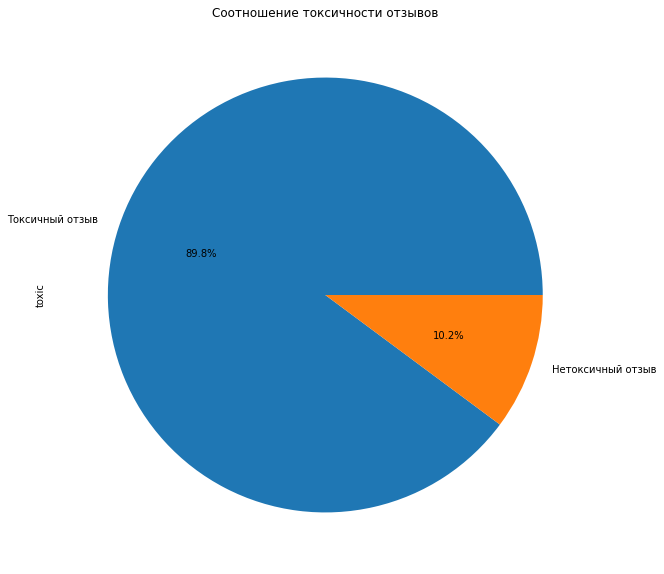

In [14]:
data['toxic'].value_counts(normalize=True).plot(
    kind='pie',
    figsize=(10, 10),
    labels=['Токсичный отзыв', 'Нетоксичный отзыв'],
    autopct='%1.1f%%'
)

plt.title('Соотношение токсичности отзывов')
plt.show()

На графике заметно, что у нас есть большой дисбаланс между токсичными/не токсичными комментариями. Так как датасет очень большой, то нет смысла увеличивать не токсичные отзывы, что приведет к еще большему увеличению данных, поэтому уменьшим количество токсичных отзывов при помощи downsample.

### Стоп-слова

Нам необходимо разделить датасет на обучающую и тестовую выборку, чтобы убрать стоп-слова, так как функцию fit() необходимо выполнить только на обучающей. Иначе тестирование будет нечестным: в модели будут учтены частоты слов из тестовой выборки.

In [15]:
features = data['lemm_text']
target = data['toxic']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE)

<font color='blue'> После того, как была создана тренировочная выборка, сделаем на ней downsample. Для этого напишем функцию downsample, рандомно выберем из тренировочной выборки часть признаков и целей, слеим их через concat и потом также перемешаем.</font></div></font>

In [16]:
#создадим функцию downsample

def downsample(features, target, fraction):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_sample = features_zeros.sample(frac=fraction, random_state=0)
    target_sample = target_zeros.sample(frac=fraction, random_state=0)
    
    features_downsampled = pd.concat([features_sample] + [features_ones])
    target_downsampled = pd.concat([target_sample] + [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=RANDOM_STATE)
    target_downsampled = shuffle(target_downsampled, random_state=RANDOM_STATE)

    
    return features_downsampled, target_downsampled
    
 
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

print(features_downsampled.shape)
print(target_downsampled.shape)

(44322,)
(44322,)


In [17]:
# Проверим результаты

print('Размер тренировочного датасета - {:.0%}'.format(
    features_downsampled.shape[0]/features.shape[0]))
print('Размер тестового датасета - {:.0%}'.format(
    features_test.shape[0]/features.shape[0]))

Размер тренировочного датасета - 28%
Размер тестового датасета - 25%


In [18]:
# Создадим переменную для английского языка
stopwords = set(nltk_stopwords.words('english'))

# Создадим переменную для TFIDF-векторизатора
count_tf_idf = TfidfVectorizer(stop_words=stopwords)

# Запустим обработку обучающей и тестовой выборок
features_downsampled = count_tf_idf.fit_transform(features_downsampled)
features_test = count_tf_idf.transform(features_test)


### Выводы по предобработке данных:

- Данные поданы в правильных форматах, переформатирование не потребовалось,
- Текстовые значения были обработаны по удалению апострофов, лемматизированны и избавлены от стоп-слов.
- Изначальный дисбаланс токсичных и нетоксичных комментариев был убран при помощи модуля resample, а конкретно downsample, который сократил количество токсичных комментариев до количества нетоксичных. Это позволило также уменьшить изначальную выборку почти в пять раз, что также поможет увеличить скорость обработки данных.

## Обучение

### DummyRegressor

Для оценки результатов используем константную модель, которую создадим при помощи модуля DummyRegressor.

In [19]:
# Инициализация модели DummyClassifier

start = time.time()

dummy = DummyClassifier(strategy='stratified', random_state=RANDOM_STATE)
dummy.fit(features_downsampled, target_downsampled)
predict_dummy = dummy.predict(features_downsampled)

end = time.time()
dummy_train_time = end - start

dummy_f1 = f1_score(target_downsampled, predict_dummy)
print('F1 для DummyClassifier:', dummy_f1)

F1 для DummyClassifier: 0.2723741839517395


DummyRegressor выдал слабые результаты для F1-метрики.

### Логистическая регрессия на обучающей выборке

In [20]:
# Инициализация модели Логистическая регрессия
start = time.time()

lr = LogisticRegression(fit_intercept=True, 
                        class_weight='balanced', 
                        random_state=RANDOM_STATE,
                        solver='liblinear'
)

# Зададим параметры для GridSearch
grid_values = {'penalty': ['l1','l2'],
               'C': [0.001,0.01,0.1,1,10,100,1000]}

grcv_lr = GridSearchCV(lr, param_grid=grid_values, scoring='f1', cv=5)
grcv_lr.fit(features_downsampled, target_downsampled)

end = time.time()
lr_train_time = end - start

# Определяем лучшие гиперпараметры и результат F1
lr_params = grcv_lr.best_params_
lr_score = grcv_lr.best_score_
print(lr_params)
print('F1 для LogisticRegression:', lr_score)



{'C': 1, 'penalty': 'l1'}
F1 для LogisticRegression: 0.8510222256533242


Результат, полученный при помощи модели Логистической регрессии уже достигнут для требуемого показателя метрики F1.

### Случайный лес на обучающей выборке


In [21]:
# Инициализация модели Случайный лес
start = time.time()

rf = RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE )

# Зададим параметры для GridSearch
rf_parameters = {'n_estimators' : [5, 10, 20, 30, 50],
              'max_depth'    : [4, 6, 8, 10, 20]
}

#Применяю GridSearchCV с кросс-валидацией
grcv_rf = GridSearchCV(rf, rf_parameters, scoring='f1', cv=5)
grcv_rf.fit(features_downsampled, target_downsampled)

end = time.time()
rf_train_time = end - start

# Определяем лучшие гиперпараметры и результат F1
rf_params = grcv_rf.best_params_
rf_score = grcv_rf.best_score_
print(rf_params)
print('F1 для RandomForest:', rf_score)

{'max_depth': 20, 'n_estimators': 50}
F1 для RandomForest: 0.6587111871082428


Результат, полученный при помощи модели Случайный лес ниже чем у Логистической регрессии, и не достиг требуемого результата F1 = 75.

### CatBoost

In [22]:
# Инициализация модели Категориальный бустинг
start = time.time()

cbс = CatBoostClassifier(random_state=RANDOM_STATE, learning_rate=0.2,
                         verbose=10, n_estimators=150)
# Зададим параметры для GridSearch
cbс_parametrs = {'depth': [4, 8]}

grcv_cbc = GridSearchCV(cbс, cbс_parametrs, scoring='f1', cv=5)
grcv_cbc.fit(features_downsampled, target_downsampled, verbose=10)

end = time.time()
cbc_train_time = end - start

# Определяем лучшие гиперпараметры и результат F1
cbc_params = grcv_cbc.best_params_
cbc_score = grcv_cbc.best_score_
print(cbc_params)
print('F1 для CatBoost:', cbc_score)

0:	learn: 0.5934736	total: 275ms	remaining: 40.9s
10:	learn: 0.4032535	total: 1.34s	remaining: 16.9s
20:	learn: 0.3653273	total: 2.41s	remaining: 14.8s
30:	learn: 0.3422259	total: 3.5s	remaining: 13.4s
40:	learn: 0.3263591	total: 4.61s	remaining: 12.2s
50:	learn: 0.3128753	total: 5.66s	remaining: 11s
60:	learn: 0.3017809	total: 6.72s	remaining: 9.81s
70:	learn: 0.2913702	total: 7.8s	remaining: 8.68s
80:	learn: 0.2822230	total: 8.9s	remaining: 7.58s
90:	learn: 0.2743805	total: 9.98s	remaining: 6.47s
100:	learn: 0.2678255	total: 11s	remaining: 5.35s
110:	learn: 0.2616715	total: 12.1s	remaining: 4.25s
120:	learn: 0.2559738	total: 13.2s	remaining: 3.16s
130:	learn: 0.2516648	total: 14.3s	remaining: 2.08s
140:	learn: 0.2477459	total: 15.4s	remaining: 982ms
149:	learn: 0.2439032	total: 16.4s	remaining: 0us
0:	learn: 0.5948750	total: 131ms	remaining: 19.5s
10:	learn: 0.3999785	total: 1.35s	remaining: 17s
20:	learn: 0.3644522	total: 2.45s	remaining: 15.1s
30:	learn: 0.3435798	total: 3.63s	rema

Результат F1 = 0.81 на модели Категориальный Бустинг чуть ниже, чем у модели Логистической регрессии.

### LGBMClassifier

In [23]:
# Инициализация модели LGBMClassifier
start = time.time()

lgb = LGBMClassifier(random_state=RANDOM_STATE)

# Зададим параметры для GridSearch
params = {
  'clf__n_estimators': [200],
  'clf__learning_rate': [0.15, 0.25],
  'clf__max_depth': [8, 10, -1]}

lgb_grid = GridSearchCV(estimator=lgb, param_grid=params, cv=5, scoring='f1', n_jobs=-1, refit=False)
lgb_grid.fit(features_downsampled, target_downsampled)

end = time.time()
lgb_train_time = end - start

lgb_best_params = lgb_grid.best_params_
lgb_best_score = lgb_grid.best_score_

# Определяем лучшие гиперпараметры и результат F1
print(lgb_best_params)
print('F1 для LGBMClassifier:', lgb_grid.best_score_)

{'clf__learning_rate': 0.15, 'clf__max_depth': 8, 'clf__n_estimators': 200}
F1 для LGBMClassifier: 0.8214452182049256


Результат F1 = 0.82 на модели LightGBM чуть выше, чем у Категориального бустинга, и также соответствует требуемому.

### Тестирование

Категориальный бустинг

In [26]:
cbc_model = CatBoostClassifier(depth = 8)
cbc_model.fit(features_downsampled, target_downsampled, verbose=10)
cbc_model_predictions = cbc_model.predict(features_test)

cbc_f1_test = f1_score(target_test, cbc_model_predictions)
print('F1 для CatBoost:', cbc_f1_test)

Learning rate set to 0.052004
0:	learn: 0.6598429	total: 775ms	remaining: 12m 54s
10:	learn: 0.4835254	total: 7.7s	remaining: 11m 32s
20:	learn: 0.4213482	total: 14.6s	remaining: 11m 19s
30:	learn: 0.3897115	total: 21.4s	remaining: 11m 9s
40:	learn: 0.3694682	total: 28.3s	remaining: 11m 1s
50:	learn: 0.3558131	total: 35.2s	remaining: 10m 55s
60:	learn: 0.3445379	total: 42.4s	remaining: 10m 53s
70:	learn: 0.3349873	total: 49.6s	remaining: 10m 48s
80:	learn: 0.3274866	total: 56.6s	remaining: 10m 42s
90:	learn: 0.3207250	total: 1m 3s	remaining: 10m 37s
100:	learn: 0.3147739	total: 1m 10s	remaining: 10m 31s
110:	learn: 0.3090008	total: 1m 18s	remaining: 10m 25s
120:	learn: 0.3042243	total: 1m 25s	remaining: 10m 18s
130:	learn: 0.2994550	total: 1m 32s	remaining: 10m 12s
140:	learn: 0.2946378	total: 1m 39s	remaining: 10m 4s
150:	learn: 0.2905317	total: 1m 46s	remaining: 9m 58s
160:	learn: 0.2867048	total: 1m 53s	remaining: 9m 53s
170:	learn: 0.2833794	total: 2m	remaining: 9m 46s
180:	learn: 

На тестовой выборке для Категориального бустинга F1 = 0,78, что соответствует требуемому порогу в 0,75.

## Выводы

- Данные были загружены и изучены,
- Обработка пропусков и дубликатов не потребовалась,
- Была проведена лемматизация и векторизация текстовых данных с последующим созданием мешка слов,
- Были убраны стоп-слова при помощи библиотеки nltk,
- Был исправлен дисбаланс токсичных и нетоксичных комментариев с использованием модели downsample, благодаря чему исходные данные уменьшились в размере, чем ускорили время работы моделей при обучении и тестировании,
- Требуемые результат был достигнут на модели Категориального бустинга.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны